In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from matplotlib import rc
# Enable LaTeX for text rendering
rc('text', usetex=True)
rc('text.latex', preamble="\\usepackage{siunitx}")

In [2]:
initial = np.array([
    0.719, 0.555, 0.805, 0.766, 0.489, 0.924, 0.513, 1.109, 0.732, 0.653, 0.724, 0.681, 0.82
    ])

rebound = np.array([
    0.421, 0.336, 0.485, 0.452, 0.296, 0.549, 0.315, 0.668, 0.443, 0.3937, 0.429, 0.401, 0.51
    ])

initial_sqrt = np.sqrt(initial)
rebound_sqrt = np.sqrt(rebound)
x = initial_sqrt
y = rebound_sqrt

corr, _ = pearsonr(x, y)

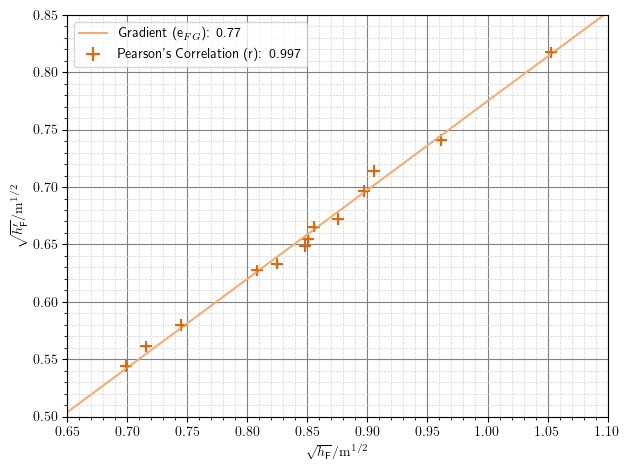

In [5]:
cross_colour = '#d96a13'
line_colour = '#f7ac73'

xlims = (0.65, 1.1)
ylims = (0.5, 0.85)

xerror = 0.005
yerror = 0.005

plt.errorbar(x, y, xerr=xerror, yerr=yerror, fmt='+', color=cross_colour, label = f'Pearson\'s Correlation (r): {round(corr, 3)}')

# plt.xlabel(r'$\sqrt{h_F}$ / $m^{1/2}$')
# plt.ylabel(r"$\sqrt{{h_F}'}$ / $m^{1/2}$")

plt.xlabel(r'$\sqrt{h_{\text{F}}} / \si{\metre^{1/2}}$')
plt.ylabel(r"$\sqrt{h_{\text{F}}'} / \si{\metre^{1/2}}$")

# Calculate the slope of the trendline passing through the origin
slope = np.sum(x * y) / np.sum(x * x)

# Generate trendline values
trendline_x = np.linspace(0, 1.5, 100)
trendline_y = slope * trendline_x

# Plot the trendline
plt.plot(trendline_x, trendline_y, color=line_colour, label = f"Gradient (e$_{{FG}}$): {round(slope, 2)}")

# Set the scale of both axes to be from 0 to 1
plt.xlim(xlims)
plt.ylim(ylims)

x_tick_positions = np.arange(xlims[0], xlims[1] + 0.01, 0.05)  # From 0.65 to 1.1 with step 0.05
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(ylims[0], ylims[1] + 0.01, 0.05)  # From 0.5 to 0.85 with step 0.05
plt.yticks(y_tick_positions)

# Add gridlines
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.8)  # Major gridlines
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)  # Minor gridlines


plt.legend()

plt.tight_layout()

plt.savefig(r"C:\Coding\practical-project-25\graphs\COR/eFG.png", dpi=600)

plt.show()